# 1. 문제정의

질문1 : 어떤 요소가 앱의 점수에 큰 영향을 주는가?

질문2 : 점수가 높은 앱의 특징은 무엇이고 점수가 낮은 앱의 특징은 무엇인가?

# 2. 방법론

## 2.1. 분석과정

이 질문에 대한 해답을 얻기 위해 아래와 '해석 가능한 머신러닝(xAI)'를 활용한다.

### 2.1.1. 프로세스

1단계 : 데이터 전처리와 EDA를 실시한다.<br>
2단계 : 머신러닝 모델을 만든다.<br>
3단계 : shap value를 통해 어떤 변수가 점수에 가장 큰 영향을 주는지 알아본다.<br>
4단계 : 점수가 높은 앱의 특징과 낮은 앱의 특징을 살펴본다.<br>
5단계 : 최종적으로 앱의 점수를 높이기 위한 방안들을 제시한다.

## 2.1. 데이터 불러오기

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [264]:
os.chdir(r'C:\Users\hjb38\Documents\데이터 분석 과정\data\googleplaystore_data')

In [265]:
data = pd.read_csv('googleplaystore.csv')

In [266]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2.2. 데이터 전처리 & EDA

### 2.2.1. 결측치 제거

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [268]:
data = data.dropna(axis=0, how='any')

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


### 2.2.2. Category(카테고리)

Text(0.5, 1.0, 'count of Category')

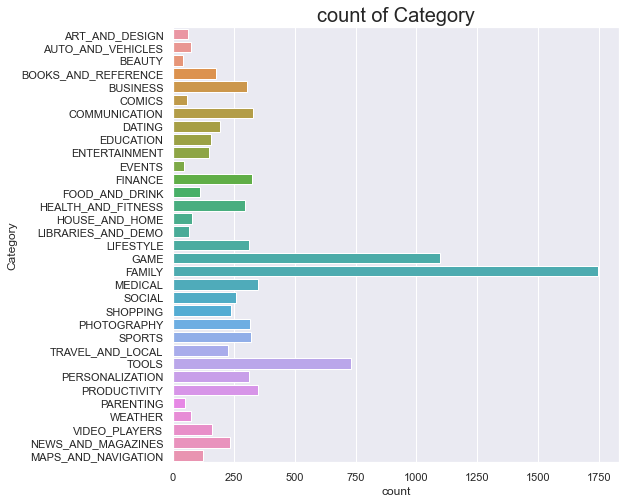

In [270]:
fig, ax = plt.subplots(figsize = (8, 8)) 
sns.countplot(y='Category', data=data)
plt.title('count of Category', size=20)

카테고리 중 가장 수가 많은 것은 Family, Game, Tools 이다.

### 2.2.3. Rating(점수)

In [332]:
data['Rating'].describe()

count    9345.00000
mean        4.19236
std         0.51530
min         1.00000
25%         4.00000
50%         4.30000
75%         4.50000
max         5.00000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating  vs  Category')

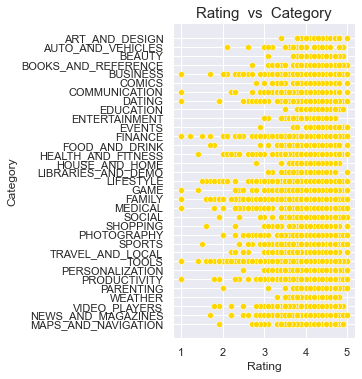

In [327]:
sns.relplot(x = 'Rating', y = 'Category', data=data, color='gold')
plt.title('Rating  vs  Category', size=15)

평균 Rating은 4.19 이다.

### 2.2.4. Reviews(리뷰)를 int형으로 변환

In [272]:
# Reviews 는 1개의 데이터 때문에 object형으로 분류됐지만,
# 결측치로 제거했기에 이제 int형으로 변경할 수 있다.
data['Reviews'] = data['Reviews'].astype(int)

In [273]:
data['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

Text(0.5, 1.0, 'Reviews  vs  Rating')

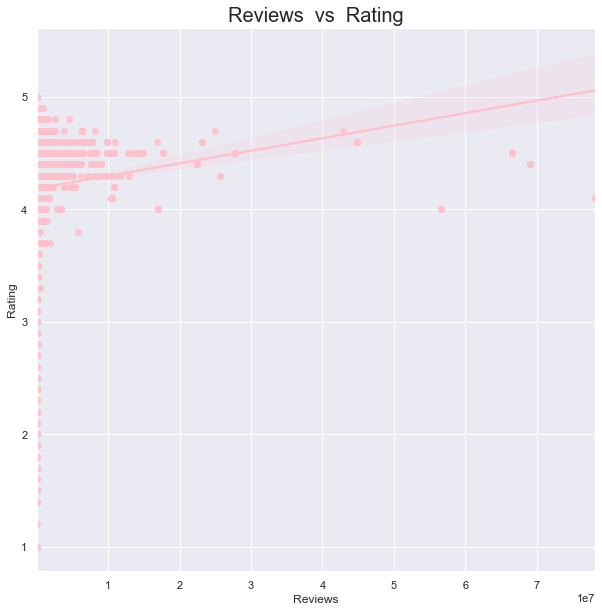

In [274]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", data=data, color='pink')
plt.title('Reviews  vs  Rating', size=20)

Reviews 는 Rating과 양의 상관관계를 가진다.

### 2.2.5. Size(앱 용량)를 int형으로 변환

In [275]:
data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
317k                     1
226k                     1
48k                      1
404k                     1
283k                     1
Name: Size, Length: 413, dtype: int64

In [276]:
# 'Varies with device'라는 값이 있기 때문에 이걸 nan으로 바뚸준다.
data['Size'] = data['Size'].replace('Varies with device', np.nan)

In [277]:
# k와 M을 각각 000과 000000으로 바꿔주되, '.'을 없애고 int 형으로 바꿔준다.
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [278]:
data['Size'].value_counts()

14000000.0    165
12000000.0    161
15000000.0    159
11000000.0    159
13000000.0    157
             ... 
818.0           1
953.0           1
72.0            1
144.0           1
23.0            1
Name: Size, Length: 411, dtype: int64

In [279]:
# 변환한 nan을 각 앱의 카테고리별 평균 값으로 대체한다.
data['Size'] = data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'))

In [280]:
data['Size'].value_counts()

14000000.0    165
12000000.0    161
11000000.0    159
15000000.0    159
13000000.0    157
             ... 
144.0           1
400.0           1
18.0            1
288.0           1
23.0            1
Name: Size, Length: 444, dtype: int64

Text(0.5, 1.0, 'Size  vs  Rating')

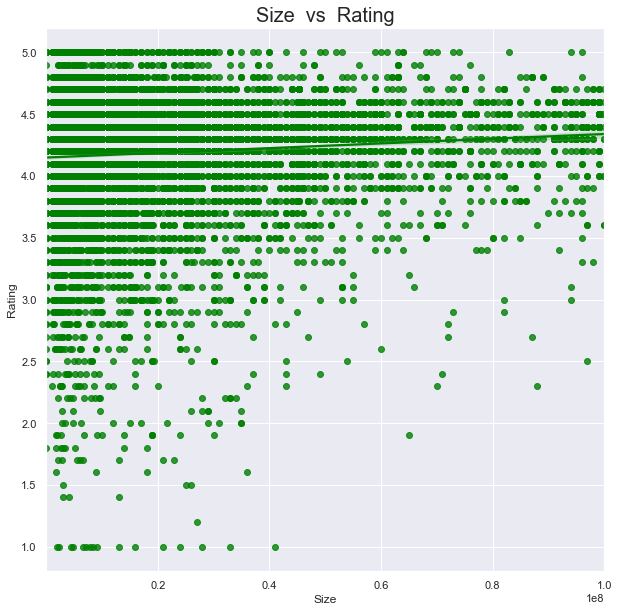

In [281]:
plt.figure(figsize = (10,10))
sns.regplot(x="Size", y="Rating", data=data, color='green')
plt.title('Size  vs  Rating', size=20)

Size는 Rating과 양의 상관관계를 가진다.

### 2.2.6. Installs(다운로드 횟수)를 int 형으로 변환

In [282]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [283]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')

In [284]:
data['Installs'] = data['Installs'].astype(int)

In [285]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

Text(0.5, 1.0, 'Install  vs  Rating')

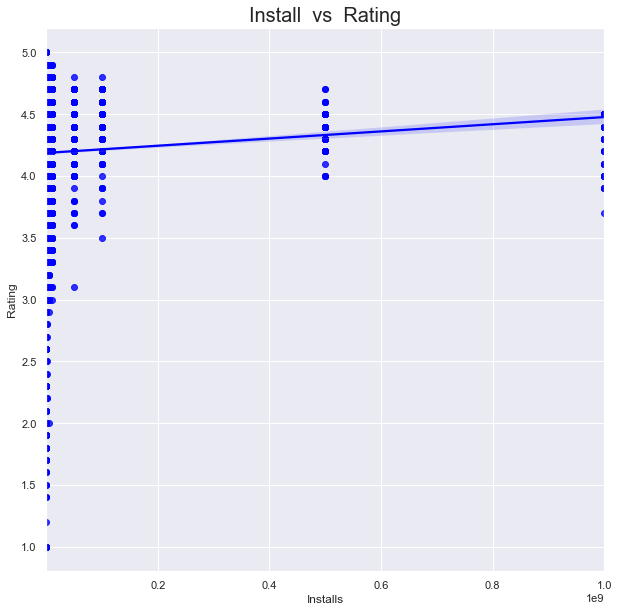

In [286]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", data=data, color='blue')
plt.title('Install  vs  Rating', size=20)

Install은 Rating과 양의 상관관계를 가진다.

### 2.2.7. Type(유/무료)를 int 형으로 변환

In [287]:
# Type는 Free와 Paid 둘 뿐이므로 각각 0과 1을 부여한다.

def type_int(types):
    if types == 'Free':
        return 0
    else:
        return 1
data['Type'] = data['Type'].map(type_int)

In [288]:
data['Type'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Free  vs  Paid')

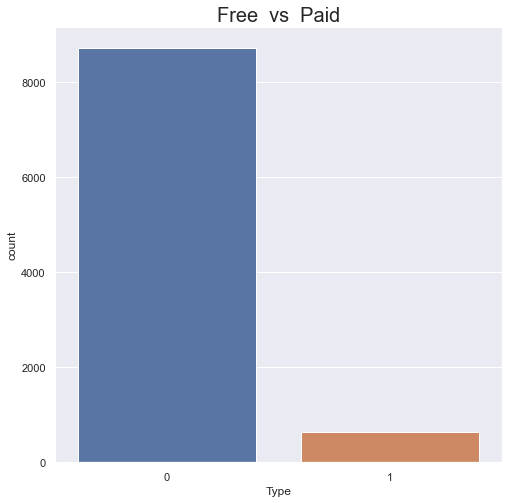

In [289]:
fig, ax = plt.subplots(figsize = (8, 8)) 
sns.countplot(x='Type', data=data)
plt.title('Free  vs  Paid', size=20)

Text(0.5, 1.0, 'Type  vs  Rating')

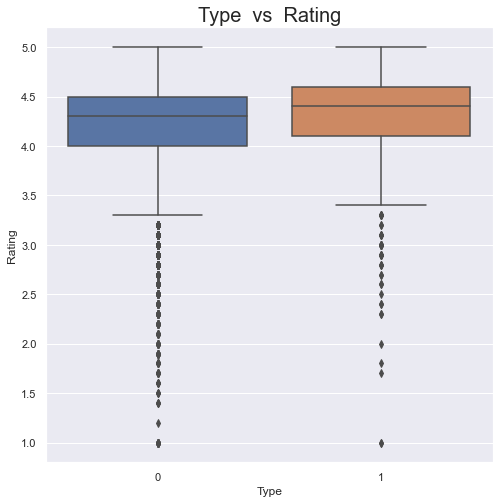

In [290]:
# Free 보다는 Paid가 약간 더 Rating가 높지만 큰 차이는 아니다.
plt.figure(figsize = (8,8))
sns.boxplot(x="Type", y="Rating", data=data)
plt.title('Type  vs  Rating', size=20)

Free와 Paid 간에 평균 점수는 비슷하지만, Paid가 약간 더 점수가 높다.

### 2.2.8. Price(가격)에서 $빼고 float 형으로 변환, 이상치 제거

In [291]:
data['Price'].value_counts().head()

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [292]:
data['Price'] = data['Price'].str.replace('$', '')

In [293]:
data['Price'].value_counts().head()

0       8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: Price, dtype: int64

In [294]:
data['Price'] = data['Price'].astype(float)

In [420]:
#가격이 무려 400달러나 되는 앱이 있다.
data['Price'].describe()

count    9345.000000
mean        0.334693
std         2.169924
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

Text(0.5, 1.0, 'distribution of Price')

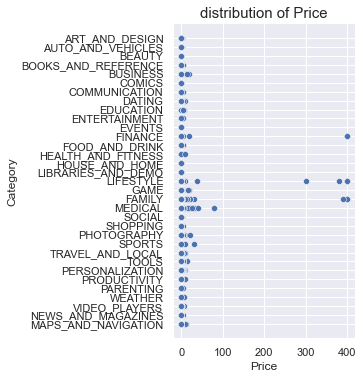

In [296]:
sns.relplot(x="Price", y="Category", data=data)
plt.title('distribution of Price', size=15)

In [297]:
data[data['Price'] > 299]

# 확인해보니  I'm rich 라는 자신의 부유함을 과시하는 앱으로, 아무런 기능도 없는 앱이다.
# 이 앱들은 이번 프로젝트의 방향과는 맞지 않으니 제거해주도록 한다.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,1,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,1,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,1,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,1,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,1,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600000.0,10000,1,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,1,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,1,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,1,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,1,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [298]:
rich = data[data['Price'] > 299].index
data.drop(rich, inplace=True)

Text(0.5, 1.0, 'New Price')

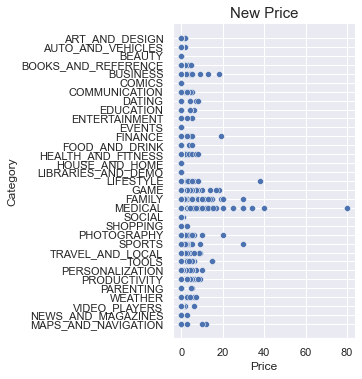

In [299]:
sns.relplot(x="Price", y="Category", data=data)
plt.title('New Price', size=15)

In [300]:
# 이번엔 Price를 더 세분화 해서 Rating 과의 관계를 비교해보자

data.loc[ data['Price'] == 0, 'Price_detail'] = 'a) 0'
data.loc[(data['Price'] > 0) & (data['Price'] <= 1), 'Price_detail'] = 'b) 0-1'
data.loc[(data['Price'] > 1) & (data['Price'] <= 3), 'Price_detail'] = 'c) 1-3'
data.loc[(data['Price'] >3) & (data['Price'] <= 5), 'Price_detail'] = 'd) 3-5'
data.loc[(data['Price'] > 5) & (data['Price'] <= 15), 'Price_detail'] = 'e) 5-15'
data.loc[(data['Price'] > 15) & (data['Price'] <= 30), 'Price_detail'] = 'f) 15-30'
data.loc[data['Price'] > 30, 'Price_detail']  = 'g) 30-'

In [301]:
df_Price = data[['Price_detail', 'Rating']].groupby(['Price_detail'], as_index=False).mean()
df_Price.sort_values(['Price_detail'])

,Price_detail,Rating
0,a) 0,4.186288
1,b) 0-1,4.303704
2,c) 1-3,4.291667
3,d) 3-5,4.250318
4,e) 5-15,4.269149
5,f) 15-30,4.252000
6,g) 30-,4.066667


Text(0.5, 1.0, 'Price_detail  vs  Rating')

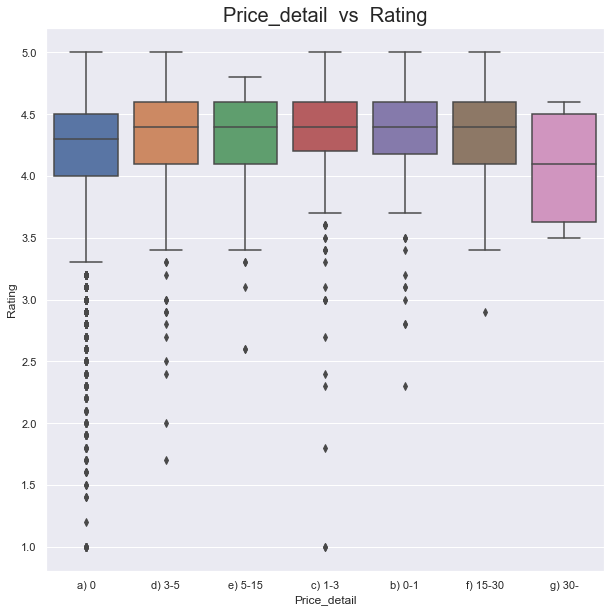

In [302]:
plt.figure(figsize = (10,10))
sns.boxplot(x="Price_detail", y="Rating", data=data)
plt.title('Price_detail  vs  Rating', size=20)

가격이 무료 ~ 30달러인 App 의 점수는 비슷하지만, 30달러가 넘어가면 점수가 다소 낮아진다.

### 2.2.9. Content Rating(이용등급)

In [333]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Content Rating')

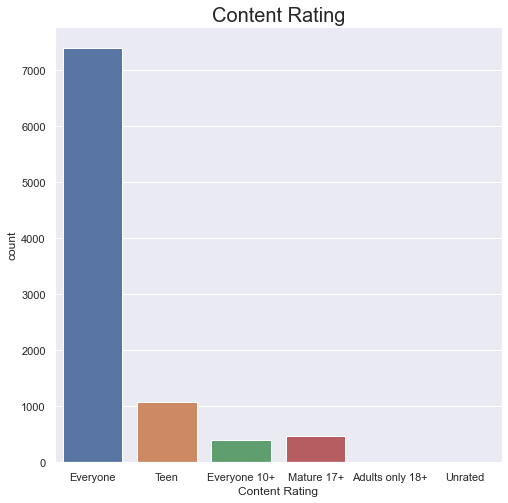

In [334]:
fig, ax = plt.subplots(figsize = (8, 8)) 
sns.countplot(x='Content Rating', data=data)
plt.title('Content Rating', size=20)

### 2.2.10. Genres(세부/중복 카테고리) 간략화

In [303]:
# Genres는 Category의 세부분류이거나 중복 카테고리를 표시한 것이지만,
# Category 대부분이 컬럼과 겹친다.
data['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10834                    Education
10836                    Education
10837                    Education
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 9345, dtype: object

In [304]:
# 또한 세부분류를 한 것들은 각각의 수가 너무 적어서 의미있는 데이터라고 보기 어렵다.
data.Genres.value_counts().tail(15)

Health & Fitness;Action & Adventure    1
Card;Brain Games                       1
Lifestyle;Education                    1
Strategy;Creativity                    1
Travel & Local;Action & Adventure      1
Racing;Pretend Play                    1
Arcade;Pretend Play                    1
Tools;Education                        1
Communication;Creativity               1
Puzzle;Education                       1
Strategy;Education                     1
Entertainment;Education                1
Music & Audio;Music & Video            1
Adventure;Brain Games                  1
Parenting;Brain Games                  1
Name: Genres, dtype: int64

In [305]:
# 따라서 Genres의 값들을 ; 을 기준으로 나눈 뒤 앞의 값들만 사용한다.
data['Genres'] = data['Genres'].str.split(';').str[0]

In [306]:
data['Genres'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [307]:
# Music & Audio 은 Music에 포함시키기로 한다.
data.Genres.value_counts().tail(10)

Comics           58
Parenting        50
Card             48
Events           45
Beauty           42
Casino           37
Trivia           28
Word             28
Music            24
Music & Audio     1
Name: Genres, dtype: int64

In [308]:
data['Genres'] = data['Genres'].str.replace('Music & Audio', 'Music')

In [309]:
data.Genres.value_counts().tail(10)

Board        60
Comics       58
Parenting    50
Card         48
Events       45
Beauty       42
Casino       37
Word         28
Trivia       28
Music        25
Name: Genres, dtype: int64

Text(0.5, 1.0, 'Genres  vs  Rating')

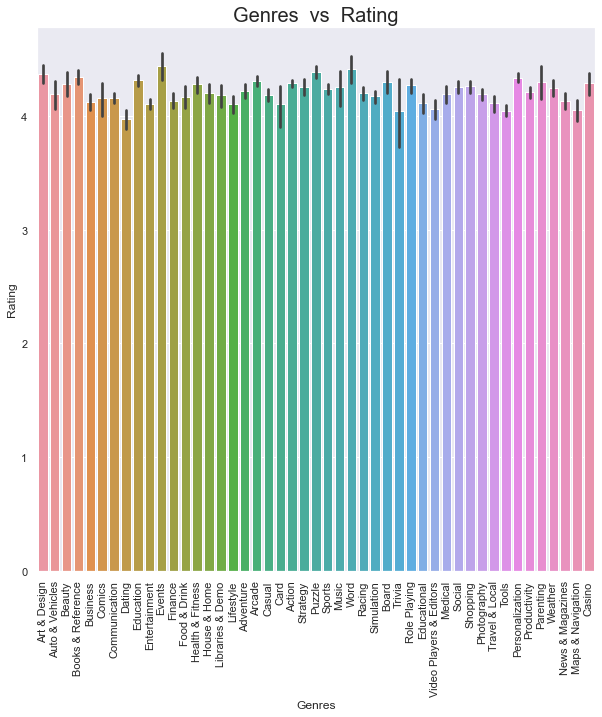

In [310]:
plt.figure(figsize = (10,10))
sns.barplot(x="Genres", y="Rating", data=data)
plt.xticks(rotation=90)
plt.title('Genres  vs  Rating', size=20)

Genres의 종류는 Rating와 큰 상관이 없어 보인다.

### 2.2.11. Last Updated를 int 형으로 변환
Last Updated는 숫자와 문자가 섞여있어서 바로 datetime 형식으로 바꾸는데 어려움이 있다.<br>
따라서 Last Updated 상의 가장 최근 날짜를 현재날짜라 가정하고, 각 데이터의 Last Updated 날짜에서 현재날짜를 뺌으로서 마지막 업데이트를 한 지 몇 일이 지났는지 계산하는 방식을 이용한다.

In [311]:
data['date'] = pd.to_datetime(data['Last Updated'])
data['date'].describe()

<ipython-input-311-6afdadc00e25>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['date'].describe()


count                    9345
unique                   1299
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: date, dtype: object

In [312]:
data['date'].max()
# 2018-08-03을 현재날짜라고 가정한다.

Timestamp('2018-08-08 00:00:00')

In [313]:
# lastupdate 컬럼을 만들어 계산한 값을 넣는다.
data['lastupdate'] = (data['date'] -  data['date'].max()).dt.days
data['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

In [314]:
# date는 지워준다.
data = data.drop(labels = ['date'], axis = 1)

# Last Updated도 지운다.
data = data.drop(labels = ['Last Updated'], axis = 1)

Text(0.5, 1.0, 'lastupdate  vs  Rating')

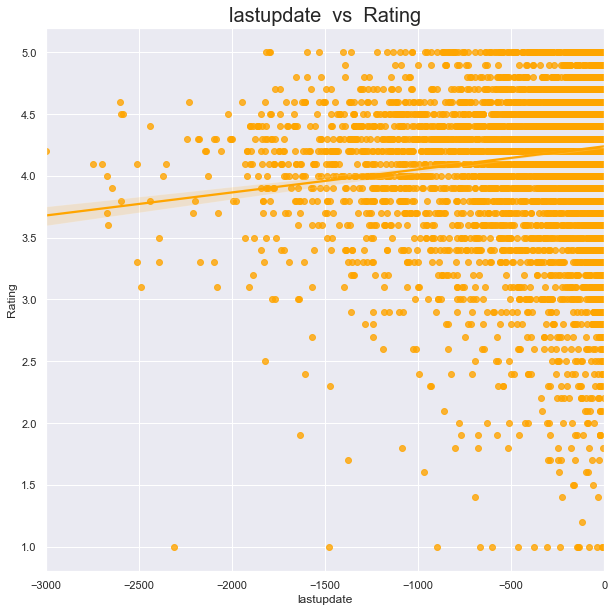

In [318]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", data=data, color='orange')
plt.title('lastupdate  vs  Rating', size=20)

최근에 업데이트 했을 수록  Rating이 높다.

### 2.2.12. App, Current Ver, Android Ver 제거

In [335]:
# App은 고유한 이름이기에 데이터로 사용하기에 어려움이 잇음으로 제거
data = data.drop(labels = ['App'], axis = 1)

In [336]:
# Current Ver, Android Ver는 앱마다 버전의 기준이 다르며,
# 'Varies with device' 값을 다른 것으로 대체하기 어렵기 때문에
# 해석에 어려움이 있을 것으로 판단 되어 제거.
data = data.drop(labels = ['Current Ver', 'Android Ver'], axis = 1)

## 2.3. 원핫 인코딩

In [337]:
data.dtypes

Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                int64
Price             float64
Content Rating     object
Genres             object
Price_detail       object
lastupdate          int64
dtype: object

In [340]:
# Price_detail은 확인했으니 지워준다.
data = data.drop(labels = ['Price_detail'], axis = 1)

In [341]:
data.dtypes

Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                int64
Price             float64
Content Rating     object
Genres             object
lastupdate          int64
dtype: object

In [342]:
data = pd.get_dummies(data, columns = ['Category', 'Content Rating', 'Genres'])
data.head()

,Rating,Reviews,Size,Installs,Type,Price,lastupdate,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,159,19000000.0,10000,0,0.0,-213,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,-205,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,-7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,-61,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,-49,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.4. train 과 test 데이터로 나누기

In [358]:
data.info()
# 데이터는 총 9345개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 10840
Data columns (total 93 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rating                          9345 non-null   float64
 1   Reviews                         9345 non-null   int32  
 2   Size                            9345 non-null   float64
 3   Installs                        9345 non-null   int32  
 4   Type                            9345 non-null   int64  
 5   Price                           9345 non-null   float64
 6   lastupdate                      9345 non-null   int64  
 7   Category_ART_AND_DESIGN         9345 non-null   uint8  
 8   Category_AUTO_AND_VEHICLES      9345 non-null   uint8  
 9   Category_BEAUTY                 9345 non-null   uint8  
 10  Category_BOOKS_AND_REFERENCE    9345 non-null   uint8  
 11  Category_BUSINESS               9345 non-null   uint8  
 12  Category_COMICS                 9

In [351]:
# 9345개의 데이터 중 8:2 비율로 train, test 데이터를 지정한다.

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [353]:
train.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', '

In [354]:
# Rating을 제외한 나머지를 input_var라는 변수에 넣어서 사용

input_var = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated', 'Genres_Action',
       'Genres_Adventure', 'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Auto & Vehicles', 'Genres_Beauty', 'Genres_Board',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Card',
       'Genres_Casino', 'Genres_Casual', 'Genres_Comics',
       'Genres_Communication', 'Genres_Dating', 'Genres_Education',
       'Genres_Educational', 'Genres_Entertainment', 'Genres_Events',
       'Genres_Finance', 'Genres_Food & Drink', 'Genres_Health & Fitness',
       'Genres_House & Home', 'Genres_Libraries & Demo', 'Genres_Lifestyle',
       'Genres_Maps & Navigation', 'Genres_Medical', 'Genres_Music',
       'Genres_News & Magazines', 'Genres_Parenting', 'Genres_Personalization',
       'Genres_Photography', 'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Racing', 'Genres_Role Playing', 'Genres_Shopping',
       'Genres_Simulation', 'Genres_Social', 'Genres_Sports',
       'Genres_Strategy', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Trivia', 'Genres_Video Players & Editors', 'Genres_Weather',
       'Genres_Word']

## 2.5. 모델링

### 2.5.1. 상관계수 확인

만약 인풋변수들 끼리 서로 상관성이 높으면 shqp value시 모델을 해석하는 데에 어려움이 있을 수 있다.
때문에 모데링 전에 서로 높은 상관성을 띄는 변수들을 제거해준다.

In [355]:
# corr()로 상관계수 확인
corr = train[input_var].corr()

# 시각화
corr.style.background_gradient(cmap='coolwarm')

# 붉은 색일수록 상관계수가 높다.

In [386]:
genres = ['Genres_Action',
       'Genres_Adventure', 'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Auto & Vehicles', 'Genres_Beauty', 'Genres_Board',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Card',
       'Genres_Casino', 'Genres_Casual', 'Genres_Comics',
       'Genres_Communication', 'Genres_Dating', 'Genres_Education',
       'Genres_Educational', 'Genres_Entertainment', 'Genres_Events',
       'Genres_Finance', 'Genres_Food & Drink', 'Genres_Health & Fitness',
       'Genres_House & Home', 'Genres_Libraries & Demo', 'Genres_Lifestyle',
       'Genres_Maps & Navigation', 'Genres_Medical', 'Genres_Music',
       'Genres_News & Magazines', 'Genres_Parenting', 'Genres_Personalization',
       'Genres_Photography', 'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Racing', 'Genres_Role Playing', 'Genres_Shopping',
       'Genres_Simulation', 'Genres_Social', 'Genres_Sports',
       'Genres_Strategy', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Trivia', 'Genres_Video Players & Editors', 'Genres_Weather',
       'Genres_Word']

train = train.drop(labels = genres, axis = 1)
test = test.drop(labels = genres, axis = 1)

In [387]:
train.columns

Index(['Rating', 'Reviews', 'Size', 'Type', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 

In [359]:
# 1차 확인 결과 Category와 Genres 간의 상관계수가 대부분이 1이거나 1에 가까우므로
# Genres관련 변수들을 모두 지워주고 다시 살펴본다.

input_var = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated']

In [360]:
# corr()로 상관계수 확인
corr = train[input_var].corr()

# 시각화
corr.style.background_gradient(cmap='coolwarm')

,Reviews,Size,Installs,Type,Price,lastupdate,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
Reviews,1.000000,0.120244,0.626582,-0.042581,-0.023989,0.087900,-0.012339,-0.013712,-0.010163,-0.015942,-0.026492,-0.011961,0.134262,-0.021857,-0.013517,-0.003759,-0.011241,-0.039618,-0.027344,-0.015106,0.111138,-0.022617,-0.012987,-0.012291,-0.027459,-0.010985,-0.032235,-0.018504,-0.011423,-0.012538,0.008456,-0.013144,0.001801,0.084252,-0.017156,-0.022594,-0.008493,0.004139,-0.008511,-0.002576,-0.072872,0.084454,-0.012204,0.047305,-0.001875
Size,0.120244,1.000000,0.049305,-0.021061,0.005011,0.214071,-0.031765,0.004515,-0.021852,-0.050439,-0.059979,-0.037611,-0.087994,-0.026455,-0.014606,-0.004169,-0.027788,0.164209,-0.036012,0.014064,0.395042,0.020688,-0.022801,-0.040611,-0.063943,-0.020177,-0.022662,-0.066979,-0.009679,-0.093292,-0.050379,-0.090086,-0.039837,-0.028405,0.030948,-0.190629,0.018102,-0.042476,-0.041262,-0.010160,-0.208522,0.154168,0.036229,0.143072,-0.008579
Installs,0.626582,0.049305,1.000000,-0.052454,-0.029599,0.105023,-0.013842,-0.016463,-0.012237,-0.006969,-0.028007,-0.015098,0.171523,-0.026529,-0.019633,0.005093,-0.013469,-0.063757,-0.030688,-0.018625,0.055013,-0.025122,-0.015424,-0.014692,-0.032749,-0.016431,-0.038976,0.018791,-0.013866,-0.021646,0.024522,0.051295,-0.006141,0.059792,-0.025371,-0.008772,0.033731,0.027788,-0.011785,-0.003125,-0.040556,0.032817,-0.021449,0.045283,-0.002267
Type,-0.042581,-0.021061,-0.052454,1.000000,0.563437,-0.188053,-0.001534,-0.017403,-0.017048,-0.016998,-0.021651,-0.021590,0.004187,-0.031889,-0.022721,-0.034593,-0.018683,0.040199,-0.030161,-0.024752,0.010786,-0.019447,-0.023954,-0.020901,-0.015765,-0.008574,0.146430,-0.043019,-0.005060,0.096616,-0.005596,-0.014585,-0.036854,-0.045883,0.007114,0.021154,-0.022709,-0.024028,0.015614,-0.004394,0.036224,0.011208,-0.029025,-0.033102,-0.003106
Price,-0.023989,0.005011,-0.029599,0.563437,1.000000,-0.080848,-0.007601,-0.011868,-0.009605,-0.013123,-0.005251,-0.012165,-0.012910,-0.018766,-0.013188,-0.019491,-0.010527,0.015878,-0.015172,-0.014751,-0.012501,-0.014344,-0.013497,-0.011776,-0.013468,-0.003614,0.235184,-0.024239,-0.003081,0.002821,-0.006083,-0.014399,-0.022454,-0.025852,0.001485,-0.004297,-0.012020,-0.016223,0.005442,-0.002475,0.016892,0.003805,-0.006445,-0.019274,-0.001750
lastupdate,0.087900,0.214071,0.105023,-0.188053,-0.080848,1.000000,0.029696,0.036089,0.018531,-0.022335,-0.001695,0.027260,0.009033,0.064246,0.007645,0.059050,0.022207,-0.077635,0.054812,0.050765,-0.015781,0.042503,0.007395,-0.020090,-0.028364,0.035325,-0.031202,0.040024,0.026573,-0.091983,0.008518,-0.005676,0.064387,0.038116,0.030391,-0.086739,0.039582,-0.018127,-0.006969,0.009542,-0.084288,0.026949,0.065491,0.047388,-0.061672
Category_ART_AND_DESIGN,-0.012339,-0.031765,-0.013842,-0.001534,-0.007601,0.029696,1.000000,-0.007046,-0.005103,-0.011024,-0.014640,-0.006462,-0.015289,-0.011774,-0.010525,-0.010354,-0.005592,-0.038009,-0.015167,-0.008874,-0.029438,-0.014797,-0.007170,-0.006256,-0.014671,-0.009454,-0.016062,-0.012876,-0.005896,-0.015106,-0.014983,-0.016522,-0.013051,-0.013733,-0.014859,-0.023422,-0.012188,-0.010819,-0.007470,-0.001315,0.029112,-0.017082,-0.018291,-0.013665,-0

높은 상관성을 띄는 변수는 다음과 같다.

- Installs, Reviews
- Price, Type
- Category_GAME, Size
- Category_DATING, Content Rating_Mature 17+
- Content Rating_Teen, Category_ENTERTAINMENT

각 쌍 중 하나의 변수만 제거해야한다. 그 기준은 타겟값과의 상관계수.<br>
상관계수의 절대값이 더 작은 것을 제거한다.<br>
타겟값 : Raiting

In [362]:
train['Installs'].corr(train['Rating'])

0.05105215544574281

In [363]:
train['Reviews'].corr(train['Rating'])

0.0674038316503687

In [373]:
# Installs 를 제거
del train['Installs']
del test['Installs']

In [364]:
train['Price'].corr(train['Rating'])

0.023183936406015584

In [365]:
train['Type'].corr(train['Rating'])

0.03301316069293032

In [374]:
# Price를 제거
del train['Price']
del test['Price']

In [366]:
train['Category_GAME'].corr(train['Rating'])

0.06130468118838639

In [367]:
train['Size'].corr(train['Rating'])

0.08233403346324128

In [375]:
# Category_GAME 을 제거
del train['Category_GAME']
del test['Category_GAME']

In [368]:
train['Category_DATING'].corr(train['Rating'])

-0.05435379054235127

In [369]:
train['Content Rating_Mature 17+'].corr(train['Rating'])

-0.027384482011407665

In [376]:
# Content Rating_Mature 17+ 을 제거
del train['Content Rating_Mature 17+']
del test['Content Rating_Mature 17+']

In [370]:
train['Content Rating_Teen'].corr(train['Rating'])

0.030862180235420637

In [371]:
train['Category_ENTERTAINMENT'].corr(train['Rating'])

-0.016487327612486946

In [377]:
# Category_ENTERTAINMENT 를 제거
del train['Category_ENTERTAINMENT']
del test['Category_ENTERTAINMENT']

In [388]:
# 인풋변수 다시 지정
train.columns

Index(['Rating', 'Reviews', 'Size', 'Type', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 

In [393]:
input_var = ['Reviews', 'Size', 'Type', 'lastupdate',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Teen',
       'Content Rating_Unrated']

### 2.5.2 Xgboost

<strong>Xgboost를 사용하는 이유</strong> <br>
: shap value를 활용하기 위해서는 모델이 랜덤포레스트 형태의 tree형 모델이어야 한다. <br>
그 중 Xgboost가 속도가 빠르면서도 높은 성능을 유지하므로 이를 선택했다.

In [391]:
from xgboost import XGBClassifier

In [416]:
model = XGBClassifier(n_estimators=300, learning_rate=0.1)
model.fit(train[input_var], train['Rating'])

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[21:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###  정확도 확인

In [417]:
predictions = model.predict(test[input_var])

In [418]:
test['pred'] = predictions
(test['pred'] == test['Rating']).mean()

0.2541466024612092

## 2.4 shap value 활용

shap value를 활용하면 인풋변수들 중 어떤게 타겟값에 큰 영향을 미치는 알 수 있다.

In [410]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(train[input_var])

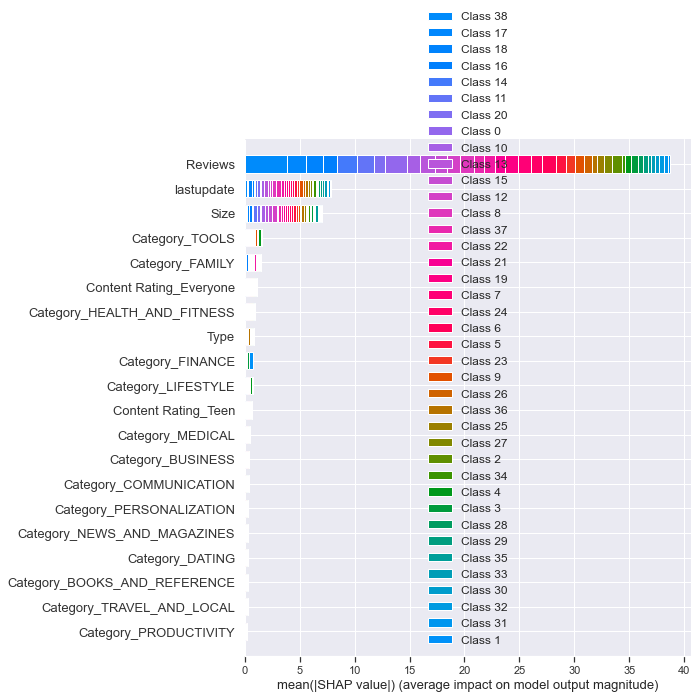

In [411]:
shap.summary_plot(shap_values, train[input_var], plot_type='bar')

In [409]:
shap.dependence_plot('Reviews', shap_values, train[input_var])

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.